# EMAIL SPAM DETECTION WITH MACHINE LEARNING

PROBLEM STATEMENT:We've all been the reciepient of spam emails before. Spam mail, or junk mail, is a type of email that is sent to a massive number of users at one time, frequently containing cryptic messages, scams or most dangerously, phishing content.
Let's start by exploring the Logistic Regression machine learning algorithm.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

In [2]:
#Read dataset from CSV.
df=pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#To concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#To get the descriptive statistics.
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [5]:
#To get the info of the dtype object.
df.describe(include='object')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
#To check if dataset contains any missing values or not.
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#To check the the duplicates in the dataset.
df.duplicated().sum()

403

In [8]:
#To return the tota number of elements of the dataset.
df.size

27860

In [9]:
#To get the column names.
df.columns
df.tail(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [10]:
#To remove missing values
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
df.rename({'v1':'label','v2':'text'},inplace=True,axis=1)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#To remove duplicate rows.
df.drop_duplicates()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
#To get the dimensions of the dataset.
df.shape

(5572, 2)

In [14]:
#To show column labels of the dataset
df.columns

Index(['label', 'text'], dtype='object')

In [15]:
#Dropping 
X = df.drop('label',axis=1)
y = df.label
X.shape,y.shape

((5572, 1), (5572,))

In [16]:
df['label'].value_counts()            

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
#Independent and Dependent features
X = df.drop('label',axis=1)
y = df.label
X.shape,y.shape

((5572, 1), (5572,))

In [18]:
#Encoding the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [19]:
#Data Preprocessing
vocab_size = 3000
messages = X.copy()
messages.reset_index(inplace=True)
messages.head()

,index,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,2,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,U dun say so early hor... U c already then say...
4,4,"Nah I don't think he goes to usf, he lives aro..."


# Data Visualization

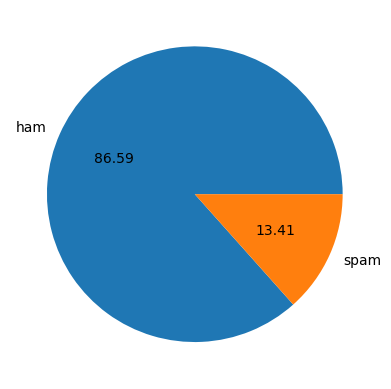

In [20]:
#Pie chart
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [21]:
#Data Modeling
t = df['text']
l= df['label']
t,l

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 5567    This is the 2nd time we have tried 2 contact u...
 5568                Will Ì_ b going to esplanade fr home?
 5569    Pity, * was in mood for that. So...any other s...
 5570    The guy did some bitching but I acted like i'd...
 5571                           Rofl. Its true to its name
 Name: text, Length: 5572, dtype: object,
 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 5567    spam
 5568     ham
 5569     ham
 5570     ham
 5571     ham
 Name: label, Length: 5572, dtype: object)

In [22]:
#Data Processing 
import nltk
nltk.download('punkt')
def alter(text):
    
    #to make lowercase
    text = text.lower()
    
    #to tokenize
    text = nltk.word_tokenize(text)
    
    #removing special charecters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    
    #Stemming
    from nltk.stem.porter import PorterStemmer
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Priya_Harsha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(t,l, test_size = 0.2, random_state = 3)

In [24]:
xtrain

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: text, Length: 4457, dtype: object

In [25]:
ytrain

3075    ham
1787    ham
1614    ham
4304    ham
3266    ham
       ... 
789     ham
968     ham
1667    ham
3321    ham
1688    ham
Name: label, Length: 4457, dtype: object

In [26]:
xtest

2632                       I WILL CAL YOU SIR. In meeting
454     Loan for any purpose å£500 - å£75,000. Homeown...
983     LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...
1282    Ever green quote ever told by Jerry in cartoon...
4610                                  Wat time Ì_ finish?
                              ...                        
4827    Lol no. Just trying to make your day a little ...
5291      Xy trying smth now. U eat already? We havent...
3325    Huh so fast... Dat means u havent finished pai...
3561    Still chance there. If you search hard you wil...
1136    Dont forget you can place as many FREE Request...
Name: text, Length: 1115, dtype: object

In [27]:
ytest

2632     ham
454     spam
983      ham
1282     ham
4610     ham
        ... 
4827     ham
5291     ham
3325     ham
3561     ham
1136    spam
Name: label, Length: 1115, dtype: object

In [28]:
#Importing Logistic Regression Classifier.
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier

LogisticRegression()

In [29]:
#Logistic Regression
model_l = LogisticRegression()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn import svm
featureextraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True, max_features=3000)
xtrainfeatures = featureextraction.fit_transform(xtrain)
xtestfeatures = featureextraction.transform(xtest)

In [31]:
model_l.fit(xtrainfeatures, ytrain)

LogisticRegression()

In [32]:
#Testing the Model
from sklearn.metrics import accuracy_score
predict= model_l.predict(xtrainfeatures)
acc= accuracy_score(ytrain, predict)

In [33]:
# Replace this with the actual email text
mail = "Congratulations you are selected for internship!"  
# Call the 'alter' function with the email text as input
input1 = alter(mail)
# Now 'input1' will contain the preprocessed and altered version of the email text
print(input1)

congratul you are select for internship


In [34]:
inp= featureextraction.transform([input1])
prediction=model_l.predict(inp)
if (prediction[0]==1):
    print('Spam mail')
else:
    print('Non-Spam mail')

Non-Spam mail


In [35]:
accuracy= accuracy_score(ytrain, predict)*100
accuracy

97.19542293022212